# #  Real Estate house price predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("DATA.csv")

# housing.head()

In [3]:
housing.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288275,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704338,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
%matplotlib inline

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

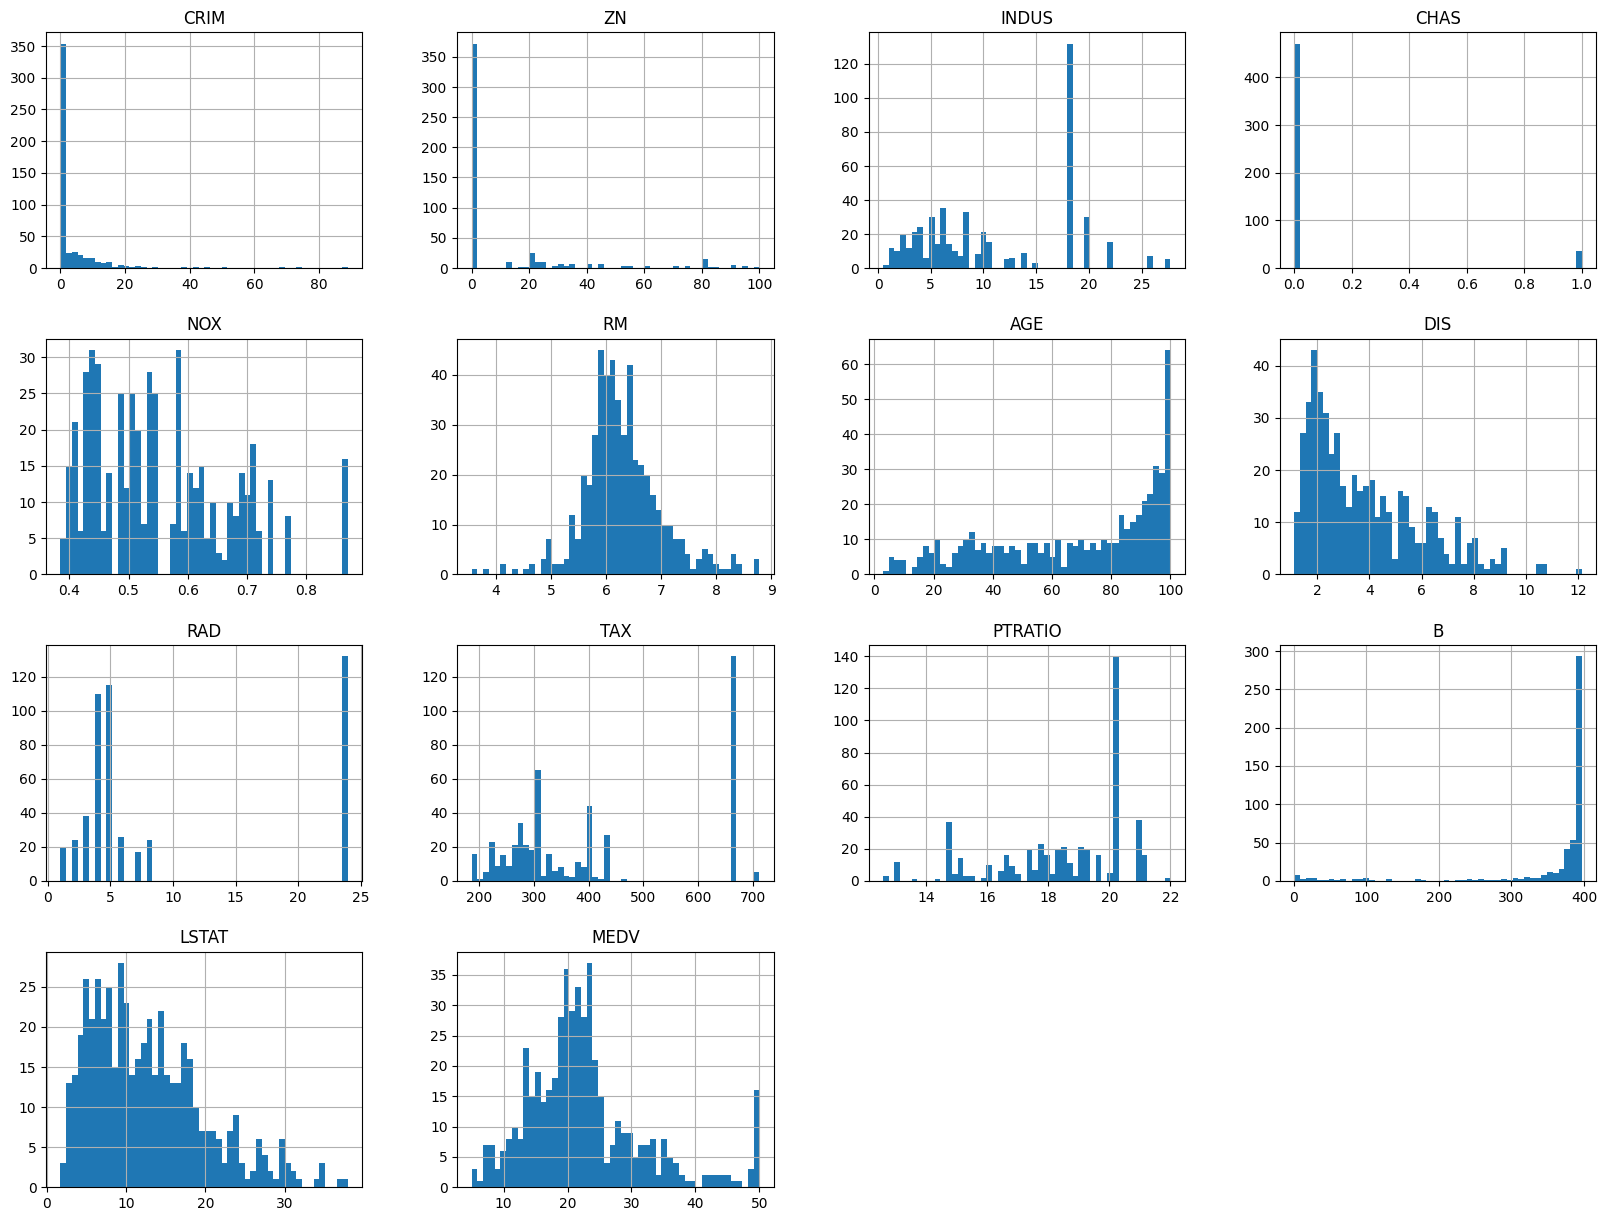

In [7]:
import matplotlib.pyplot as pit
housing.hist(bins=50, figsize=(20, 15))

## Train test spelitting


In [8]:
 import numpy as np
 def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)* test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [9]:
train_set, test_set = split_train_test(housing, 0.2)


[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")


Rows in train set: 404
Rows in test set: 102



In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
    

In [12]:
strat_test_set.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
336,1.15172,0.0,8.14,0,0.538,5.701,95.0,3.7872,4,307,21.0,358.77,18.35,13.1
369,2.73397,0.0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4
215,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21,19.3
282,0.37578,0.0,10.59,1,0.489,5.404,88.6,3.6650,4,277,18.6,395.24,23.98,19.3
49,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7


In [13]:
housing =  strat_train_set.copy()

## Looking for correlations

In [14]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.692084
ZN         0.353459
B          0.343579
DIS        0.214523
CHAS       0.186157
AGE       -0.362248
RAD       -0.380040
NOX       -0.402712
CRIM      -0.402863
TAX       -0.457088
INDUS     -0.458836
PTRATIO   -0.499341
LSTAT     -0.738416
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

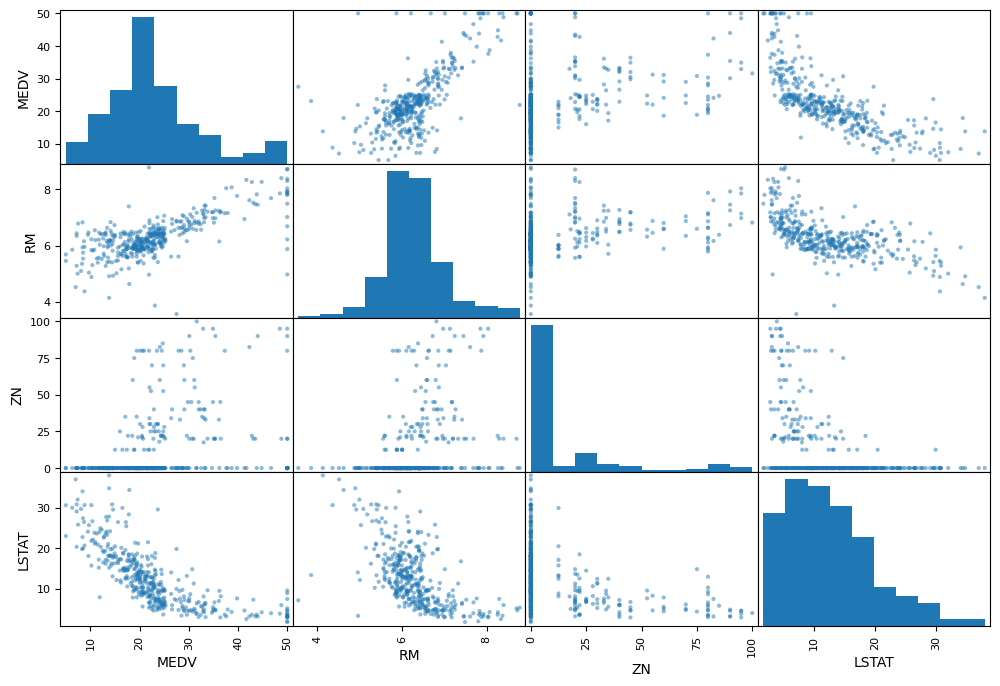

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))


<AxesSubplot: xlabel='RM', ylabel='MEDV'>

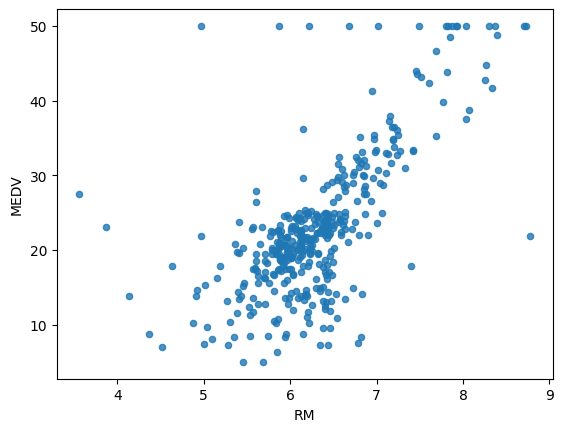

In [16]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combination 

In [17]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [18]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
247,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2,47.180667
343,1.34284,0.0,19.58,0,0.605,6.066,100.0,1.7573,5,403,14.7,353.89,6.43,24.3,66.435872
476,15.02340,0.0,18.10,0,0.614,NaN,97.3,2.1007,24,666,20.2,349.48,24.91,12.0,NaN
314,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264,13.0,391.93,6.90,30.1,38.585209
319,0.76162,20.0,3.97,0,0.647,5.560,62.8,1.9865,5,264,13.0,392.40,10.45,22.8,47.482014


In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.692084
ZN         0.353459
B          0.343579
DIS        0.214523
CHAS       0.186157
AGE       -0.362248
RAD       -0.380040
NOX       -0.402712
CRIM      -0.402863
TAX       -0.457088
INDUS     -0.458836
PTRATIO   -0.499341
TAXRM     -0.522341
LSTAT     -0.738416
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

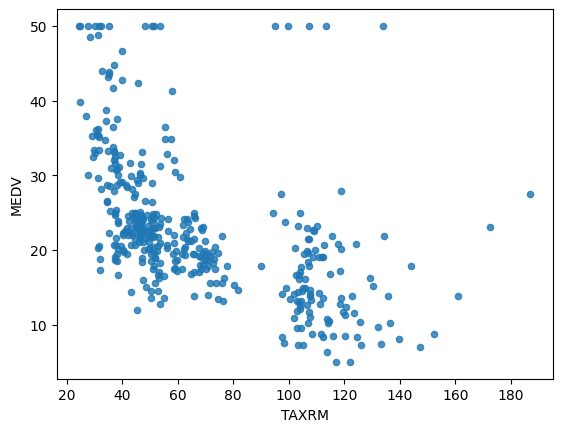

In [20]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [21]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [22]:
a = housing.dropna(subset=["RM"])
a.shape

(400, 13)

In [23]:
 median = housing["RM"].median()
  

In [24]:
housing["RM"].fillna(median)

247    6.0830
343    6.0660
476    6.2175
314    6.8420
319    5.5600
        ...  
95     6.8260
421    6.0060
103    7.7650
455    6.7820
239    7.6910
Name: RM, Length: 404, dtype: float64

In [25]:
housing.shape

(404, 13)

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([2.34405e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.32000e-01,
       6.21750e+00, 7.86000e+01, 3.19095e+00, 5.00000e+00, 3.30000e+02,
       1.89500e+01, 3.91305e+02, 1.13600e+01])

In [28]:
X = imputer.transform(housing)

In [29]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [30]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.420778,11.928218,11.027748,0.069307,0.555128,6.296502,68.835891,3.794261,9.623762,409.188119,18.399505,356.400297,12.621485
std,7.667988,23.781492,6.861219,0.254290,0.118098,0.708920,28.431875,2.130373,8.752003,169.173452,2.175501,90.263689,7.243836
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,3.500000,1.730000
25%,0.080050,0.000000,5.085000,0.000000,0.448000,5.911000,45.075000,2.100525,4.000000,277.000000,16.975000,375.175000,6.867500
50%,0.234405,0.000000,8.560000,0.000000,0.532000,6.217500,78.600000,3.190950,5.000000,330.000000,18.950000,391.305000,11.360000
75%,3.790445,18.500000,18.100000,0.000000,0.631000,6.590750,94.100000,5.117025,24.000000,666.000000,20.200000,395.705000,16.945000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Creating a Piprline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                       ('std_scaler', StandardScaler()),
                       ])

In [32]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [33]:
housing_num_tr

array([[-0.41519247, -0.50219759, -0.53230635, ...,  0.55250891,
         0.44923845,  0.02329205],
       [-0.27132473, -0.50219759,  1.24800805, ..., -1.7026388 ,
        -0.02784519, -0.85578441],
       [ 1.51500077, -0.50219759,  1.03203548, ...,  0.82864945,
        -0.07676262,  1.69851323],
       ...,
       [-0.43806251, -0.50219759, -1.2502692 , ..., -0.2759127 ,
         0.43437465, -0.6995963 ],
       [ 0.96800015, -0.50219759,  1.03203548, ...,  0.82864945,
        -3.71406781,  1.82014645],
       [-0.41769296,  0.33983531, -0.59359586, ...,  0.09227468,
         0.38124211, -0.83505148]])

## Selecting a desired model 

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [35]:
some_data = housing.iloc[:5]

In [36]:
some_labels = housing_labels.iloc[:5]

In [37]:
prepared_data = my_pipeline.transform(some_data)

In [38]:
model.predict(prepared_data)

array([21.724, 23.775, 12.858, 29.947, 22.517])

In [39]:
list(some_labels)

[22.2, 24.3, 12.0, 30.1, 22.8]

## Evaluting the model

In [40]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [41]:
lin_rmse

1.2236597325601213

## using better evaluation technique - cross validation

In [42]:
from sklearn.model_selection import cross_val_score
scores =cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [43]:
rmse_scores

array([2.75476603, 2.70336567, 4.36313567, 3.23955408, 3.13538903,
       2.33058855, 3.88925775, 4.31802622, 3.45344927, 2.90324305])

In [44]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("standard deviation:", scores.std())

In [45]:
print_scores(rmse_scores)

Scores: [2.75476603 2.70336567 4.36313567 3.23955408 3.13538903 2.33058855
 3.88925775 4.31802622 3.45344927 2.90324305]
Mean: 3.3090775309618907
standard deviation: 0.657096639371557


##  Saving the model

In [46]:
from joblib import dump,load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Teating the model on test data

In [48]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [49]:
final_rmse

3.700222750316632

In [52]:
prepared_data[0]

array([-0.41519247, -0.50219759, -0.53230635, -0.27288841, -0.52672672,
       -0.30153927, -0.88517051,  0.7621435 , -0.52896414, -0.72316088,
        0.55250891,  0.44923845,  0.02329205])

## Using the model

In [55]:
from joblib import dump,load
import numpy as np
model = load('Dragon.joblib')

In [60]:
features = np.array([[-1.41519247, -0.50219759, -0.53230635, -0.27288841, -0.52672672,
       -0.30153927, -0.88517051,  6.7621435 , -0.52896414, -0.72316088,
        0.55250891,  0.44923845,  0.02329205]])
model.predict(features)


array([20.798])